# Pair Plots for Unity Job Analytics

This notebook demonstrates how to generate useful pairs plots for job analytics using the functions in `src/analysis/pair_plots.py`.

In [4]:
# Import required libraries and plotting functions
from pathlib import Path
import sys

# Add src/analysis to sys.path for imports (if needed)
sys.path.append(str(Path.cwd().parent / "src" / "analysis"))
from pair_plots import get_db_dataframe, plot_selected_pairs

# Use Path.cwd() to construct the path to the database
db_path = Path.cwd().parent / "data" / "slurm_data_small.db"
df = get_db_dataframe(db_path=db_path)
df.head()

,UUID,JobID,ArrayID,JobName,IsArray,Interactive,Preempted,Account,User,Constraints,...,Nodes,NodeList,CPUs,Memory,GPUs,GPUType,GPUMemUsage,GPUComputeUsage,CPUMemUsage,CPUComputeUsage
0,'28500523017388652451738865260',28500523,<NA>,5140_nr,False,None,False,pi_mraessi_umassd_edu,kgupta3_umassd_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",...,umd-cscdr-cpu[003-010],"[umd-cscdr-cpu003, umd-cscdr-cpu004, umd-cscdr...",441,661500,<NA>,<NA>,0.0,0.0,1.006585e+11,14.494155
1,'28519169017389527551738952757',28519169,<NA>,250pppfnvt,False,None,False,pi_mmayes_umassd_edu,mjamal_umassd_edu,"['avx512', 'amd1900x', 'amd7402', 'amd7502', '...",...,umd-cscdr-cpu[022-023],"[umd-cscdr-cpu022, umd-cscdr-cpu023]",128,131072,<NA>,<NA>,0.0,0.0,7.296860e+08,0.781196
2,'28600142017393197271739334335',28600142,<NA>,spectral_lines,False,None,False,pi_nsk_umass_edu,lyang_umass_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",...,"cpu[069,073,076-078]","[cpu069, cpu073, cpu076, cpu077, cpu078]",10,2560000,<NA>,<NA>,0.0,0.0,3.263569e+11,8.240410
3,'28958081017395470261739998627',28958081,<NA>,quarterly-updates,False,None,False,root,root,<NA>,...,cpu073,[cpu073],192,196608,<NA>,<NA>,0.0,0.0,5.284717e+09,0.390863
4,'28958084017395470261739998627',28958084,<NA>,quarterly-updates,False,None,False,root,root,<NA>,...,cpu076,[cpu076],192,196608,<NA>,<NA>,0.0,0.0,5.386953e+09,0.439131


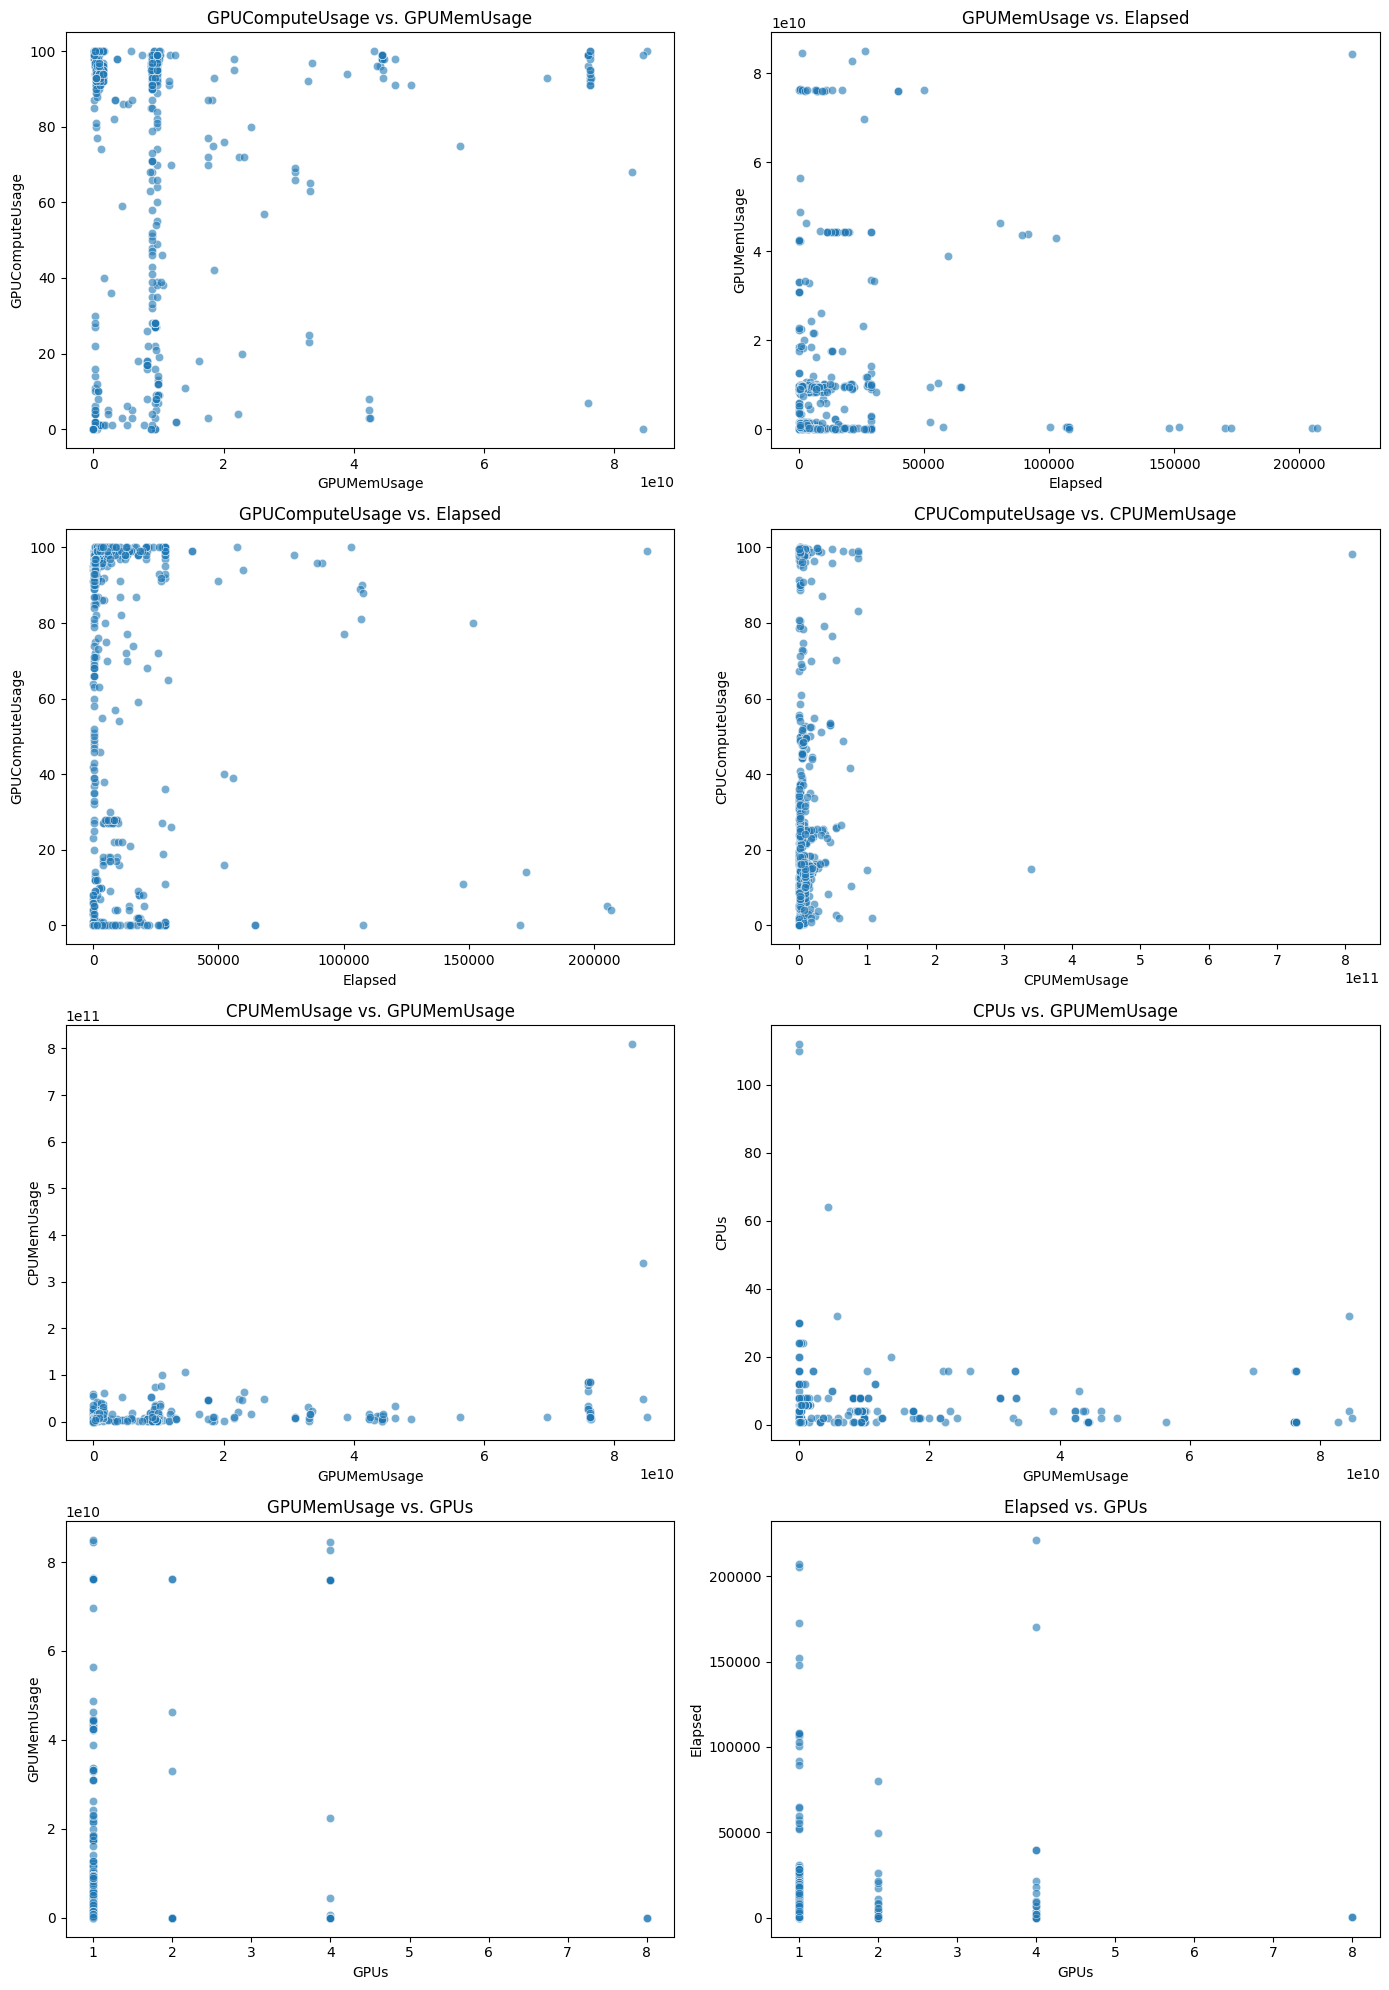

In [5]:
# Generate and display selected pairs plots for job analytics
df = df.dropna(subset=["GPUMemUsage", "GPUComputeUsage", "Elapsed", "CPUMemUsage", "CPUComputeUsage", "CPUs", "GPUs"])
plot_selected_pairs(df)